Name1 : Thulana - C861333
    
Name2 : Praveen - C860583

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df = df[['LotArea','SalePrice']]

In [6]:
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [7]:
df.isnull().mean()*100

LotArea      0.0
SalePrice    0.0
dtype: float64

In [8]:
df.shape

(1460, 2)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

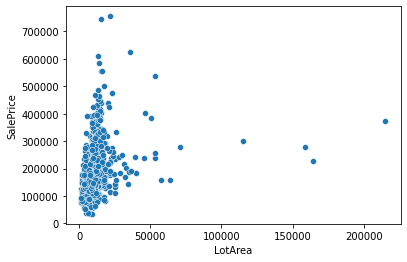

In [9]:
sns.scatterplot(x=df['LotArea'],y=df['SalePrice'])

### Finding Optimum K by Elbow Method

In [10]:
kRange = range(1,10)
sse = []
for k in kRange:
    km = KMeans(n_clusters=k)
    km.fit_predict(df)
    sse.append(km.inertia_)

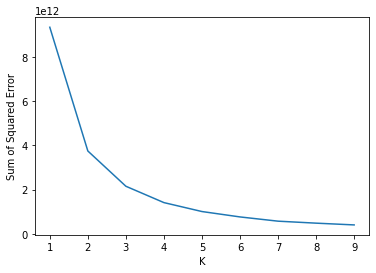

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(kRange,sse)

### Applying Kmeans without Normalizing Data

In [12]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
y_predict = km.fit_predict(df)

In [14]:
df['Cluster'] = y_predict

In [15]:
df.head()

,LotArea,SalePrice,Cluster
0,8450,208500,0
1,9600,181500,0
2,11250,223500,0
3,9550,140000,2
4,14260,250000,0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

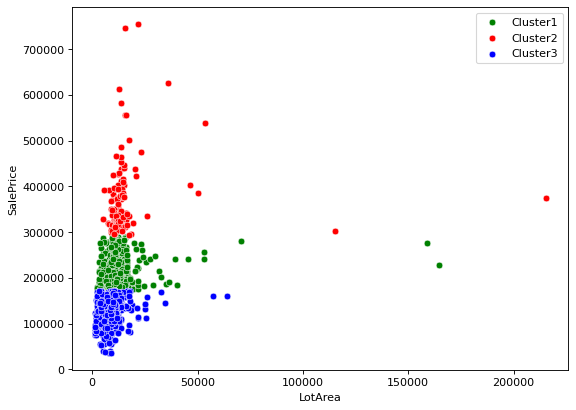

In [16]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

sns.scatterplot(df1['LotArea'],df1['SalePrice'],color='green',label = 'Cluster1')
sns.scatterplot(df2['LotArea'],df2['SalePrice'],color='red',label = 'Cluster2')
sns.scatterplot(df3['LotArea'],df3['SalePrice'],color='blue',label = 'Cluster3')

# plt.scatter(df1['LotArea'],df1['SalePrice'],color='green')
# plt.scatter(df2['LotArea'],df2['SalePrice'],color='red')
# plt.scatter(df3['LotArea'],df3['SalePrice'],color='blue')

plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.legend()

### Normalizing Data

In [17]:
scaler = MinMaxScaler()
scaler.fit(df[['SalePrice']])
df['SalePrice'] = scaler.transform(df[['SalePrice']])

scaler.fit(df[['LotArea']])
df['LotArea'] = scaler.transform(df[['LotArea']])

In [18]:
df

,LotArea,SalePrice,Cluster
0,0.033420,0.241078,0
1,0.038795,0.203583,0
2,0.046507,0.261908,0
3,0.038561,0.145952,2
4,0.060576,0.298709,0
...,...,...,...
1455,0.030929,0.194556,0
1456,0.055505,0.243161,0
1457,0.036187,0.321622,0
1458,0.039342,0.148903,2


In [19]:
km = KMeans(n_clusters=3)

In [20]:
y_predict = km.fit_predict(df)
df['Cluster'] = y_predict

In [21]:
df

,LotArea,SalePrice,Cluster
0,0.033420,0.241078,1
1,0.038795,0.203583,1
2,0.046507,0.261908,1
3,0.038561,0.145952,0
4,0.060576,0.298709,1
...,...,...,...
1455,0.030929,0.194556,1
1456,0.055505,0.243161,1
1457,0.036187,0.321622,1
1458,0.039342,0.148903,0


In [22]:
km.cluster_centers_

array([[ 3.48203823e-02,  1.30822124e-01,  2.00000000e+00],
       [ 4.90828296e-02,  2.50443517e-01, -2.22044605e-15],
       [ 7.12546449e-02,  4.68998669e-01,  1.00000000e+00]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

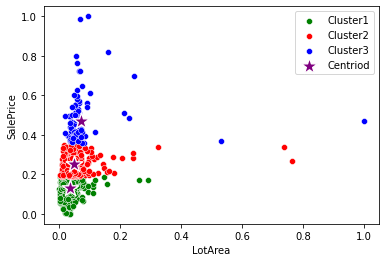

In [26]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

sns.scatterplot(df1['LotArea'],df1['SalePrice'],color='green',label = 'Cluster1')
sns.scatterplot(df2['LotArea'],df2['SalePrice'],color='red',label = 'Cluster2')
sns.scatterplot(df3['LotArea'],df3['SalePrice'],color='blue',label = 'Cluster3')
sns.scatterplot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',s=300,label = 'Centriod')

# plt.scatter(df1['LotArea'],df1['SalePrice'],color='green')
# plt.scatter(df2['LotArea'],df2['SalePrice'],color='red')
# plt.scatter(df3['LotArea'],df3['SalePrice'],color='blue')

plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.legend()

In [29]:
from pandas_profiling import ProfileReport
#Creating pandas profile
profile = ProfileReport(df, title="Pandas Profiling Report")

In [30]:
#Exporting Created Profile to HTML format
profile.to_file("Pandas_Profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]